# Import the necessary libaries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Generate the dataframe from the excel file**

In [7]:
df = pd.read_excel("beer_rnd.xlsx")
df.head()

,cost,size,alcohol,reputat,color,aroma,taste,rnd1,rnd2,rnd3,rnd4,rnd5,rnd6,rnd7
0,10,15,20,85,40,30,50,40,80,65,25,90,45,40
1,100,70,50,30,75,60,80,70,55,45,25,95,95,60
2,65,30,35,80,80,60,90,45,90,65,90,20,95,35
3,0,0,20,30,80,90,100,85,30,45,85,40,80,5
4,10,25,10,100,50,40,60,20,5,25,25,20,25,80


**Find $\tilde{x}_{n}$ from $x_{n}$**

In [8]:
x = df.values
x_mean = np.mean(x,axis=0)
x_n = x - np.matrix(x_mean)
x_n = x_n.T ## Converts row vectors to column vectors
print(x_n.shape)

(14, 99)


In [11]:
C1 = np.cov(x_n)
C2 = np.corrcoef(x_n)## Corr(x,y) = Cov(x,y)/sqrt(Var(x)*Var(y))
eig_val,eig_vec = np.linalg.eig(C1)
# print(C1)

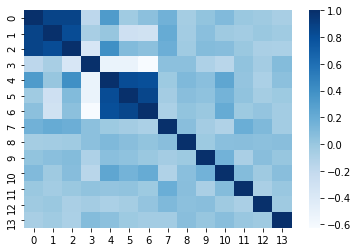

In [12]:
ax = sns.heatmap(C2,cmap='Blues')

**Extract the eigen vectors and eigen values**

In [8]:
eig_sorted = np.sort(eig_val)[::-1]
arg_sort = np.argsort(eig_val)[::-1]

eig_vec_ls = []
eig_val_ls = []
imp_vec = arg_sort[:2]
for i in imp_vec:
    e_1 = eig_vec[:,i]
    lambda_1 = eig_val[i]
    eig_vec_ls.append(e_1)
    eig_val_ls.append(lambda_1)
print(eig_vec_ls)
# print(eig_val_ls)

[array([ 0.70193013,  0.37201503,  0.2725436 , -0.32948115,  0.26089232,
        0.14239528,  0.14929638,  0.1630631 , -0.02522316,  0.08848518,
        0.17821216,  0.01762618, -0.01281384, -0.09022515]), array([ 0.28861251,  0.31249978,  0.06952238,  0.41877894, -0.30882442,
       -0.41533076, -0.37304177,  0.33366758, -0.0672483 , -0.10673324,
       -0.3129719 ,  0.03056463,  0.0527614 , -0.05373518])]
[1616.5262627268344, 1338.8130361055867]


**Estimate V**

In [9]:
eig_val_arr  = np.array(eig_val_ls)
lambda_1 = np.diag(eig_val_arr)
eig_vec_mat = np.matrix(eig_vec_ls).T
V = eig_vec_mat@np.sqrt(lambda_1)
print(V)

[[ 28.22183629  10.56027235]
 [ 14.95725385  11.43430264]
 [ 10.95790115   2.54380952]
 [-13.24713481  15.32303516]
 [ 10.48944915 -11.29982209]
 [  5.72515136 -15.19686717]
 [  6.00261733 -13.64952169]
 [  6.55612267  12.20882815]
 [ -1.01412339  -2.46060145]
 [  3.55763937  -3.90534714]
 [  7.16520659 -11.45157729]
 [  0.70867892   1.11835357]
 [ -0.51519401   1.93052865]
 [ -3.62759658  -1.96615922]]


**Compute $\sigma^{2}_{i}, i=0,1,2,...13$ and estimate S**

In [10]:
var_ls = []
x_var = np.var(x_n,axis=1)
x_var = np.ravel(x_var)

for i in range(V.shape[0]):
    s = np.sum(np.square(np.ravel(V[i,:])))
    sig_2 = x_var[i] - s
    var_ls.append(sig_2)
var_ls = np.array(var_ls)
S = np.diag(var_ls)


[[ 64.84811057   0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.        ]
 [  0.          51.71011986   0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.        ]
 [  0.           0.          22.21886762   0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.        ]
 [  0.           0.           0.         253.2982598    0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.        ]
 [  0.           0.           0.           0.          88.82868724
    0.           0.           0.           0.           0.
    0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
  123.93219113   0.           0.           0.           0.
    0.   

**Dimensionality reduction transformation**

In [11]:
C1_inv = np.linalg.inv(C1)
W = V.T@C1_inv
print(W.shape)


(2, 14)
[[ 0.01745832  0.00925271  0.00677867 -0.00819482  0.00648888  0.00354164
   0.00371328  0.00405569 -0.00062735  0.00220079  0.00443247  0.0004384
  -0.0003187  -0.00224407]
 [ 0.00788779  0.00854063  0.00190005  0.01144524 -0.00844018 -0.011351
  -0.01019524  0.00911914 -0.0018379  -0.00291702 -0.00855353  0.00083533
   0.00144197 -0.00146858]]


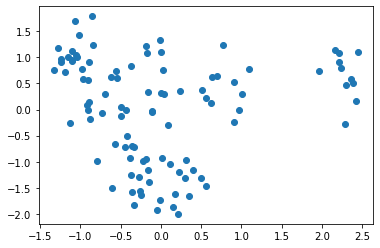

In [12]:
z = W@x_n
z1 = z.T
plt.scatter(np.ravel(z1[:,0]),np.ravel(z1[:,1]))
plt.show()